In [ ]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.datasets import make_classification

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

from sklearn import datasets
from sklearn.model_selection import GridSearchCV

# df = pd.read_csv("/content/kaggle_heart.csv")
# dataset from https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset/data

In [ ]:
random_state = 42

# Preprocessing

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df["target"].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
X = df.drop(columns=["target"])
y = df.target

# splitting 7:2:1 train:test:validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, shuffle=True, random_state=random_state)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.125, shuffle=True, random_state=random_state)

# Modeling The Base SVM Model

In [ ]:
model_linear = SVC(random_state=random_state, kernel="linear").fit(X_train, y_train)
prediction_linear = model_linear.predict(X_test)

In [ ]:
model_rbf = SVC(random_state=random_state, kernel="rbf").fit(X_train, y_train)
prediction_rbf = model_rbf.predict(X_test)

In [ ]:
model_poly = SVC(random_state=random_state, kernel="poly").fit(X_train, y_train)
prediction_poly = model_poly.predict(X_test)

In [ ]:
model_sigmoid = SVC(random_state=random_state, kernel="sigmoid").fit(X_train, y_train)
prediction_sigmoid = model_sigmoid.predict(X_test)

# Evaluating the Performance of each Kernel

In [ ]:
def get_scores(y_test, prediction):
  print("Accuracy:", accuracy_score(y_test, prediction))
  print("Sensitivity:", recall_score(y_test, prediction, pos_label=1))
  print("Specificity:", recall_score(y_test, prediction, pos_label=0))

In [ ]:
get_scores(y_test, prediction_linear)
# print(classification_report(y_test, prediction_linear))

Accuracy: 0.8048780487804879
Sensitivity: 0.9223300970873787
Specificity: 0.6862745098039216


In [ ]:
get_scores(y_test, prediction_poly)
# print(classification_report(y_test, prediction_poly))

Accuracy: 0.6634146341463415
Sensitivity: 0.6796116504854369
Specificity: 0.6470588235294118


In [ ]:
get_scores(y_test, prediction_rbf)
# print(classification_report(y_test, prediction_rbf))

Accuracy: 0.6878048780487804
Sensitivity: 0.7669902912621359
Specificity: 0.6078431372549019


In [ ]:
get_scores(y_test, prediction_sigmoid)
# print(classification_report(y_test, prediction_sigmoid))

Accuracy: 0.6097560975609756
Sensitivity: 0.5825242718446602
Specificity: 0.6372549019607843


# Hyperparameter Tuning

In [ ]:
## # Define the parameter grid
# param_grid = {
#     'C': [0.1, 1, 10, 100],
#     'gamma': [1, 0.1, 0.01, 0.001],
#     'kernel': ['rbf', 'poly', 'sigmoid','linear']
# }

# # Create a SVM model
# model = SVC(random_state=random_state)

# # Perform Grid Search with cross-validation
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
# grid_search.fit(X_train, y_train)

# # Get the best parameters and best model
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_

# # Print the best parameters
# print("Best parameters found: ", best_params)

# # Predict on the test set using the best model
# prediction_gridsearch = best_model.predict(X_val)

# # Print the classification report
# print(get_scores(y_val, prediction_gridsearch))

### Tuned Base SVM

In [ ]:
model_tuned = SVC(kernel="rbf", C=1, gamma=1, random_state=random_state).fit(X_train, y_train)

# Modeling Using Ensemble Methods

### Bagging


In [ ]:
model_bagging = BaggingClassifier(estimator=SVC(kernel="rbf", C=1, gamma=1, random_state=random_state), random_state=random_state).fit(X_train, y_train)
prediction_bagging = model_bagging.predict(X_test)

### Boosting (AdaBoost)

In [ ]:
model_boosting = AdaBoostClassifier(
    estimator=SVC(kernel="rbf", C=1, gamma=1, probability=True, random_state=random_state),
    algorithm='SAMME.R',
    random_state=random_state
).fit(X_train, y_train)
prediction_boosting = model_boosting.predict(X_test)

### Boosting (XGBoost)

In [ ]:
from xgboost import XGBClassifier

model_xgboost = XGBClassifier(random_state=random_state)
model_xgboost.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

### Stacking

In [ ]:
# Stacking (SVM + RF + KNN)

estimators_comb1 = [
    ('svm', SVC(kernel="rbf", C=1, gamma=1, random_state=random_state)),
    ('rf', RandomForestClassifier(random_state=random_state)),
    ('knn', KNeighborsClassifier())
]

model_stacking_1 = StackingClassifier(
     estimators=estimators_comb1,
     final_estimator=LogisticRegression()
)

model_stacking_1.fit(X_train, y_train)

StackingClassifier(estimators=[('svm', SVC(C=1, gamma=1, random_state=42)),
                               ('rf', RandomForestClassifier(random_state=42)),
                               ('knn', KNeighborsClassifier())],
                   final_estimator=LogisticRegression())

In [ ]:
# Stacking (SVM + NB + LR)

estimators_comb2 = [
    ('svm', SVC(kernel="rbf", C=1, gamma=1, random_state=random_state)),
    ('nb', GaussianNB()),
    ('lr', LogisticRegression(random_state=random_state))
]

model_stacking_2 = StackingClassifier(
    estimators=estimators_comb2,
    final_estimator=LogisticRegression()
)

model_stacking_2.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

StackingClassifier(estimators=[('svm', SVC(C=1, gamma=1, random_state=42)),
                               ('nb', GaussianNB()),
                               ('lr', LogisticRegression(random_state=42))],
                   final_estimator=LogisticRegression())

In [ ]:
# Stacking (SVM + RF + LR)

estimators_comb3 = [
    ('svm', SVC(kernel="rbf", C=1, gamma=1, random_state=random_state)),
    ('rf', RandomForestClassifier(random_state=random_state)),
    ('lr', LogisticRegression(random_state=random_state))
]

model_stacking_3 = StackingClassifier(
    estimators=estimators_comb3,
    final_estimator=LogisticRegression()
)

model_stacking_3.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

StackingClassifier(estimators=[('svm', SVC(C=1, gamma=1, random_state=42)),
                               ('rf', RandomForestClassifier(random_state=42)),
                               ('lr', LogisticRegression(random_state=42))],
                   final_estimator=LogisticRegression())

# Testing

### Base SVM

In [ ]:
prediction_base = model_tuned.predict(X_test)
get_scores(y_test, prediction_base)
# print(classification_report(y_test, prediction_base))

Accuracy: 0.9804878048780488
Sensitivity: 1.0
Specificity: 0.9607843137254902


### Bagging-SVM

In [ ]:
prediction_bagging = model_bagging.predict(X_test)
get_scores(y_test, prediction_bagging)
# print(classification_report(y_test, prediction_bagging))

Accuracy: 0.9707317073170731
Sensitivity: 1.0
Specificity: 0.9411764705882353


### AdaBoost-SVM

In [ ]:
prediction_adaboost = model_boosting.predict(X_test)
get_scores(y_test, prediction_boosting)
# print(classification_report(y_test, prediction_boosting))

Accuracy: 0.9804878048780488
Sensitivity: 1.0
Specificity: 0.9607843137254902


### XGboost-SVM

In [ ]:
prediction_xgboost = model_xgboost.predict(X_test)
get_scores(y_test, prediction_xgboost)

Accuracy: 0.975609756097561
Sensitivity: 0.970873786407767
Specificity: 0.9803921568627451


### Stacking-(SVM-RF-KNN)

In [ ]:
prediction_stacking_1 = model_stacking_1.predict(X_test)
get_scores(y_test, prediction_stacking_1)
# print(classification_report(y_test, prediction_stacking_1))

Accuracy: 0.975609756097561
Sensitivity: 0.970873786407767
Specificity: 0.9803921568627451


### Stacking-(SVM-NB-LR)

In [ ]:
prediction_stacking_2 = model_stacking_2.predict(X_test)
get_scores(y_test, prediction_stacking_2)
# print(classification_report(y_test, prediction_stacking_2))

Accuracy: 0.9902439024390244
Sensitivity: 1.0
Specificity: 0.9803921568627451


### Stacking-(SVM-RF-LR)

In [ ]:
prediction_stacking_3 = model_stacking_3.predict(X_test)
get_scores(y_test, prediction_stacking_3)
# print(classification_report(y_test, prediction_stacking_3))

Accuracy: 0.9902439024390244
Sensitivity: 1.0
Specificity: 0.9803921568627451


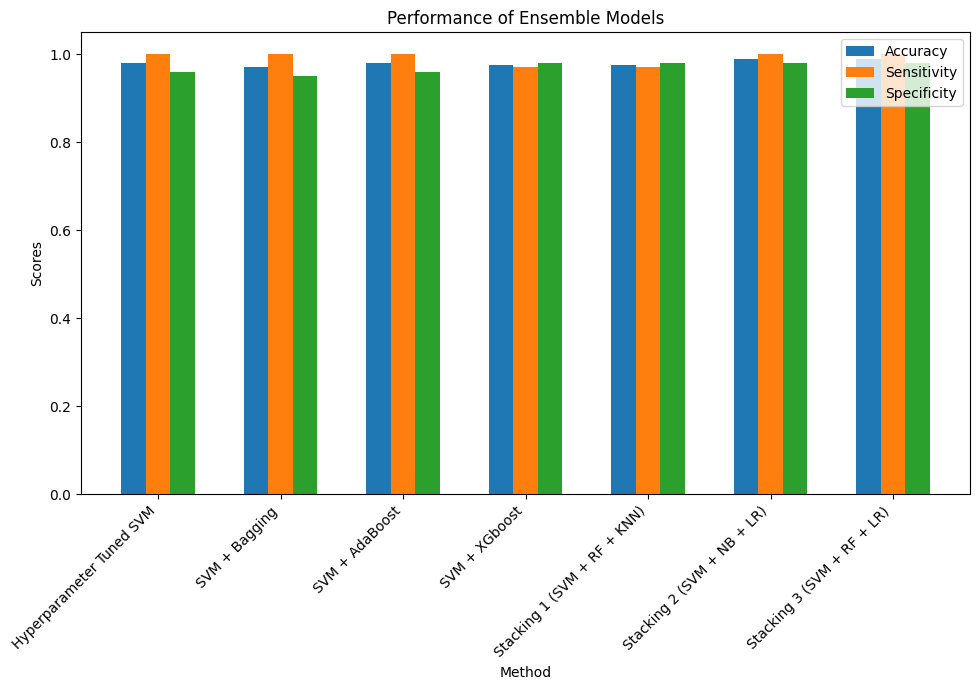

In [ ]:
# bar chart

import matplotlib.pyplot as plt
import numpy as np

# Data from the table
methods = [
    "Hyperparameter Tuned SVM", "SVM + Bagging", "SVM + AdaBoost",
    "SVM + XGboost", "Stacking 1 (SVM + RF + KNN)",
    "Stacking 2 (SVM + NB + LR)", "Stacking 3 (SVM + RF + LR)"
]

accuracy = [0.9804, 0.9707, 0.9804, 0.9756, 0.9756, 0.9902, 0.9902]
sensitivity = [1.00, 1.00, 1.00, 0.9709, 0.9709, 1.00, 1.00]
specificity = [0.9608, 0.9510, 0.9608, 0.9804, 0.9804, 0.9804, 0.9804]

x = np.arange(len(methods))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 7))
rects1 = ax.bar(x - width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x, sensitivity, width, label='Sensitivity')
rects3 = ax.bar(x + width, specificity, width, label='Specificity')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Method')
ax.set_ylabel('Scores')
ax.set_title('Performance of Ensemble Models')
ax.set_xticks(x)
ax.set_xticklabels(methods, rotation=45, ha="right")
ax.legend()

fig.tight_layout()

plt.show()
